# Intro

The task in hand is to correctly identify the digits in the given pictures of handwritten digits. Handwritten digit recognition is one of the oldest problem in computer vision and often used to benchmark classification algorithms. In this notebook, I will create a simple ANN architecture using PyTorch and train and test its accuracy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch
from torch import nn, optim
from torch.nn import Sequential
from torchvision import datasets, transforms

In [2]:
print(torch.__version__)

1.4.0+cpu


# Getting Dataset

I will be using the MNIST dataset for training and testing which can be downloaded with the help of torchvision package.

`transforms.ToTensor()` is used to convert the images to pytorch tensors. The dataset is already normalized so I am not using any normalizing transformation.

In [5]:
train_data = datasets.MNIST("torch_dataset", download=True, train=True, transform=transforms.ToTensor())
test_data = datasets.MNIST("torch_dataset", download=True, train=False, transform=transforms.ToTensor())

Extracting torch_dataset\MNIST\raw\train-images-idx3-ubyte.gz to torch_dataset\MNIST\raw



Extracting torch_dataset\MNIST\raw\train-labels-idx1-ubyte.gz to torch_dataset\MNIST\raw


Extracting torch_dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to torch_dataset\MNIST\raw


Extracting torch_dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to torch_dataset\MNIST\raw
Processing...
Done!


Next, I will be creating two generator objects named `trainloader` and `testloader` which can be itered through to get the images and labels. I am defining a batch size of 64 so in each iter, 64 images will be returned in a batch. Suffle=True will shuffle the images each time the generator is used so that during training, the model doesn't pick up any order relation.

In [6]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

# Plotting

Let's look at some example images first so that we know what we are working with.

In [7]:
# Defining a function for plotting images
def display_image(img, label, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    img = img.numpy().squeeze()
    label = label.numpy()
    
    ax.imshow(img, cmap='gray')
    ax.set_title(str(label))
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    return ax

In [8]:
# Getting some example images and corresponding labels
image, label = next(iter(trainloader))

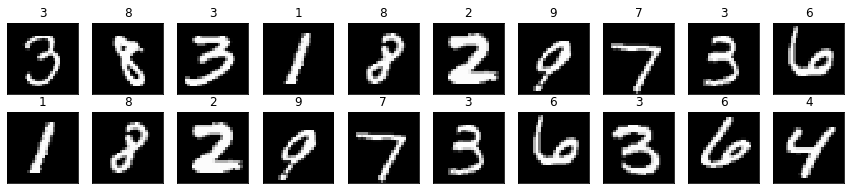

In [10]:
# Plotting 20 random examples
row = 2
column = 10
fig, ax = plt.subplots(row,column, figsize=(15,3))
for i in range(row):
    for j in range(column):
        display_image(image[3*i+j], label[3*i+j], ax = ax[i,j])

# Creating Model

The model architecture bellow contains one input layer, two hidden layer and one output layer. The MNIST dataset images are 28x28 pixels. So the first hidden layer will have 28x28 = 784 input features. And the output layer will have 10 output features as the images have 10 classes (0 to 9). ReLU activation function is used for the hidden layers and LogSoftmax activation function is used for the output layer.

In [11]:
model = Sequential(nn.Linear(784, 256),
                  nn.ReLU(),
                  nn.Linear(256, 64),
                  nn.ReLU(),
                  nn.Linear(64, 10),
                  nn.LogSoftmax())

I am using Cross entropy loss as it is a classification problem. The model outputs a log s

In [12]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)